In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 1. Set random seed for reproducibility
np.random.seed(42)

In [3]:
# 2. Parameters for synthetic dataset
n_samples = 5000  # number of clients
n_features = 5    # number of features

In [4]:
# 3. Define feature names
feature_names = [f'X{i+1}' for i in range(n_features)]

In [5]:
# 4. Assign true importance (weights)
# Higher weight => more influence on default
true_weights = {
    'X1': 3.0,   # High importance
    'X2': 1.5,   # Medium importance
    'X3': 1.0,   # Medium importance
    'X4': 0.0,   # No importance
    'X5': 0.0    # No importance
}

bias = -1.0  # intercept term

In [6]:
# 5. Generate random features (normal distribution)
X = np.random.normal(0, 1, size=(n_samples, n_features))


In [7]:
# 6. Calculate the linear combination for logistic function
linear_combination = np.dot(X, np.array([true_weights[f] for f in feature_names])) + bias

In [8]:
# 7. Apply sigmoid function to get probabilities
prob_default = 1 / (1 + np.exp(-linear_combination))

In [9]:
# 8. Generate binary target: 1 = default, 0 = no default
# Compare probability with a random number between 0 and 1
random_probs = np.random.rand(n_samples)
y = (random_probs < prob_default).astype(int)

In [10]:
# 9. Build final dataset
credit_data = pd.DataFrame(X, columns=feature_names)
credit_data['default'] = y

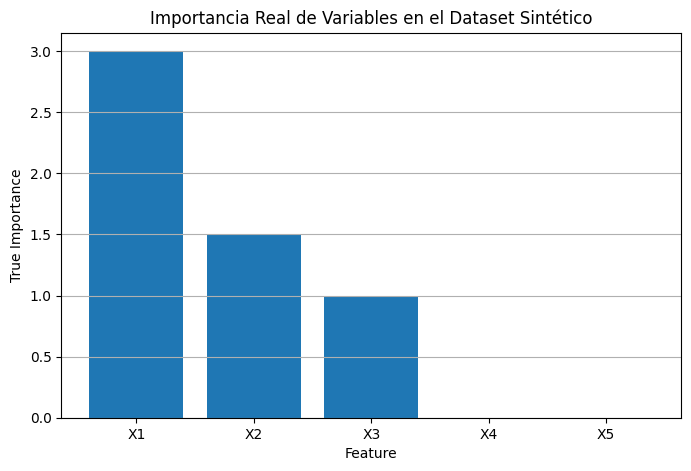

In [16]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las verdaderas importancias
true_importance_df = pd.DataFrame({
    'Feature': list(true_weights.keys()),
    'True Importance': list(true_weights.values())
})

# Ordenar de mayor a menor importancia
true_importance_df = true_importance_df.sort_values(by='True Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(true_importance_df['Feature'], true_importance_df['True Importance'])
plt.xlabel('Feature')
plt.ylabel('True Importance')
plt.title('Importancia Real de Variables en el Dataset Sintético')
plt.grid(axis='y')
plt.show()


In [14]:
credit_data.to_csv('synth_dataset.csv')